In [28]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn import metrics 
import warnings # supress warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## 1: Reading and Inspecting the Dataframe

In [29]:
# import Housing.csv
housing = pd.read_csv('train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [30]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [31]:
# Check the percentage of null values
housing.isnull().sum(axis = 0)/len(housing.index)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

## 1.1 Removing unnecessary rows and columns

In [32]:
# Drop the columns having more then 40 %  null value
housing.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis = 1,inplace = True)

# Removing rows with less then 2% NaN values
housing = housing[~pd.isnull(housing['MasVnrType'])]
housing = housing[~pd.isnull(housing['Electrical'])]
housing = housing[~pd.isnull(housing['MasVnrArea'])]

# Drop the Id columns 
housing.drop(['Id'],axis = 1,inplace = True)

In [33]:
# Step 2 : Check for duplicate rows
print(housing.shape)
housing.drop_duplicates(keep='first',inplace=True)
print(housing.shape)

# As we can see number of rows and columns are still same. There are no duplicate present in the data 

(1451, 75)
(1451, 75)


In [34]:
# Check the percentage of null values
housing.isnull().sum(axis = 0)/len(housing.index)*100

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.711923
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.000000
MasVnrArea        0.000000
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.549966
BsmtCond          2.549966
BsmtExposure      2.618884
BsmtFinType1      2.549966
BsmtFinSF1        0.000000
BsmtFinType2      2.618884
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
H

## 1.2 Analysing and Cleaning Numeric variable

Let's plot the correlations on a heatmap for better visualisation

In [35]:
# Correlation matrix
cor = housing.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.384542,-0.138039,0.034799,-0.061147,0.027979,0.040664,0.023156,-0.069241,-0.066037,-0.138789,-0.236547,-0.249775,0.307931,0.046463,0.077025,0.004115,-0.002542,0.136051,0.175813,-0.021715,0.286684,0.042300,-0.044127,0.085528,-0.039167,-0.098027,-0.012652,-0.005200,-0.010437,-0.044009,-0.026316,0.008240,-0.007773,-0.013659,-0.021583,-0.082760
LotFrontage,-0.384542,1.000000,0.425537,0.250188,-0.058763,0.123031,0.088410,0.193541,0.235006,0.050284,0.130328,0.391358,0.456398,0.081128,0.038679,0.402224,0.101956,-0.007039,0.196714,0.054209,0.262938,-0.005879,0.351383,0.266368,0.069821,0.284809,0.344726,0.087185,0.149717,0.011070,0.070295,0.041735,0.206715,0.003499,0.010541,0.008425,0.350300
LotArea,-0.138039,0.425537,1.000000,0.106305,-0.002297,0.015708,0.015190,0.104141,0.213081,0.111674,-0.004250,0.258538,0.295977,0.052979,0.004897,0.261152,0.157695,0.048365,0.122526,0.016364,0.117788,-0.024708,0.188012,0.269677,-0.024055,0.154761,0.180767,0.173170,0.086278,-0.023114,0.020568,0.043498,0.077885,0.038221,0.003177,-0.012969,0.264668
OverallQual,0.034799,0.250188,0.106305,1.000000,-0.090940,0.572129,0.550499,0.411699,0.236421,-0.058211,0.309461,0.536836,0.476645,0.299021,-0.030071,0.594431,0.108108,-0.039348,0.552939,0.272338,0.106013,-0.184799,0.430817,0.400090,0.547677,0.600055,0.560502,0.240728,0.303215,-0.113176,0.030972,0.066271,0.065720,-0.031183,0.068514,-0.025116,0.790085
OverallCond,-0.061147,-0.058763,-0.002297,-0.090940,1.000000,-0.376557,0.075545,-0.128333,-0.042292,0.039234,-0.137104,-0.167932,-0.139260,0.027720,0.025099,-0.076631,-0.051877,0.117217,-0.190170,-0.061030,0.014334,-0.081338,-0.055864,-0.020470,-0.323979,-0.184777,-0.151204,-0.004514,-0.031432,0.074612,0.025123,0.053925,-0.002254,0.068617,-0.004210,0.043487,-0.076361
YearBuilt,0.027979,0.123031,0.015708,0.572129,-0.376557,1.000000,0.590324,0.316345,0.250209,-0.047609,0.150218,0.394285,0.285655,0.009036,-0.183738,0.199621,0.187085,-0.036897,0.469310,0.239672,-0.068781,-0.173867,0.097251,0.151023,0.824502,0.537508,0.478948,0.226960,0.185758,-0.386748,0.032145,-0.048977,0.005368,-0.033994,0.009756,-0.014559,0.523274
YearRemodAdd,0.040664,0.088410,0.015190,0.550499,0.075545,0.590324,1.000000,0.180136,0.128422,-0.066485,0.182219,0.292985,0.243464,0.139804,-0.061980,0.288569,0.118850,-0.011137,0.440011,0.180316,-0.038566,-0.148432,0.193851,0.115594,0.640097,0.419764,0.371088,0.207514,0.224140,-0.192185,0.046012,-0.037471,0.006198,-0.009866,0.018959,0.035263,0.507488
MasVnrArea,0.023156,0.193541,0.104141,0.411699,-0.128333,0.316345,0.180136,1.000000,0.264469,-0.072443,0.114298,0.363667,0.344255,0.174874,-0.069127,0.390818,0.085017,0.026581,0.277238,0.202058,0.102898,-0.037698,0.280839,0.248800,0.253348,0.364381,0.372990,0.159754,0.125461,-0.110363,0.018752,0.061367,0.011697,-0.029854,-0.006159,-0.008147,0.477486
BsmtFinSF1,-0.069241,0.235006,0.213081,0.236421,-0.042292,0.250209,0.128422,0.264469,1.000000,-0.049498,-0.496605,0.520098,0.442838,-0.135330,-0.064447,0.205944,0.647159,0.068473,0.056371,0.002778,-0.105617,-0.086643,0.044288,0.257828,0.153196,0.222531,0.295374,0.205447,0.107279,-0.105887,0.026926,0.063139,0.141361,0.003852,-0.016387,0.016969,0.383995
BsmtFinSF2,-0.066037,0.050284,0.111674,-0.058211,0.039234,-0.047609,-0.066485,-0.072443,-0.049498,1.000000,-0.209806,0.106092,0.098654,-0.099445,0.014596,-0.008956,0.160068,0.070547,-0.075366,-0.031261,-0.015990,-0.040503,-0.035155,0.047318,-0.086518,-0.037494,-0.017641,0.067684,0.004155,0.036680,-0.030211,0.088430,0.041597,0.004784,-0.014977,0.031880,-0.010350


Let's plot the correlations on a heatmap for better visualisation

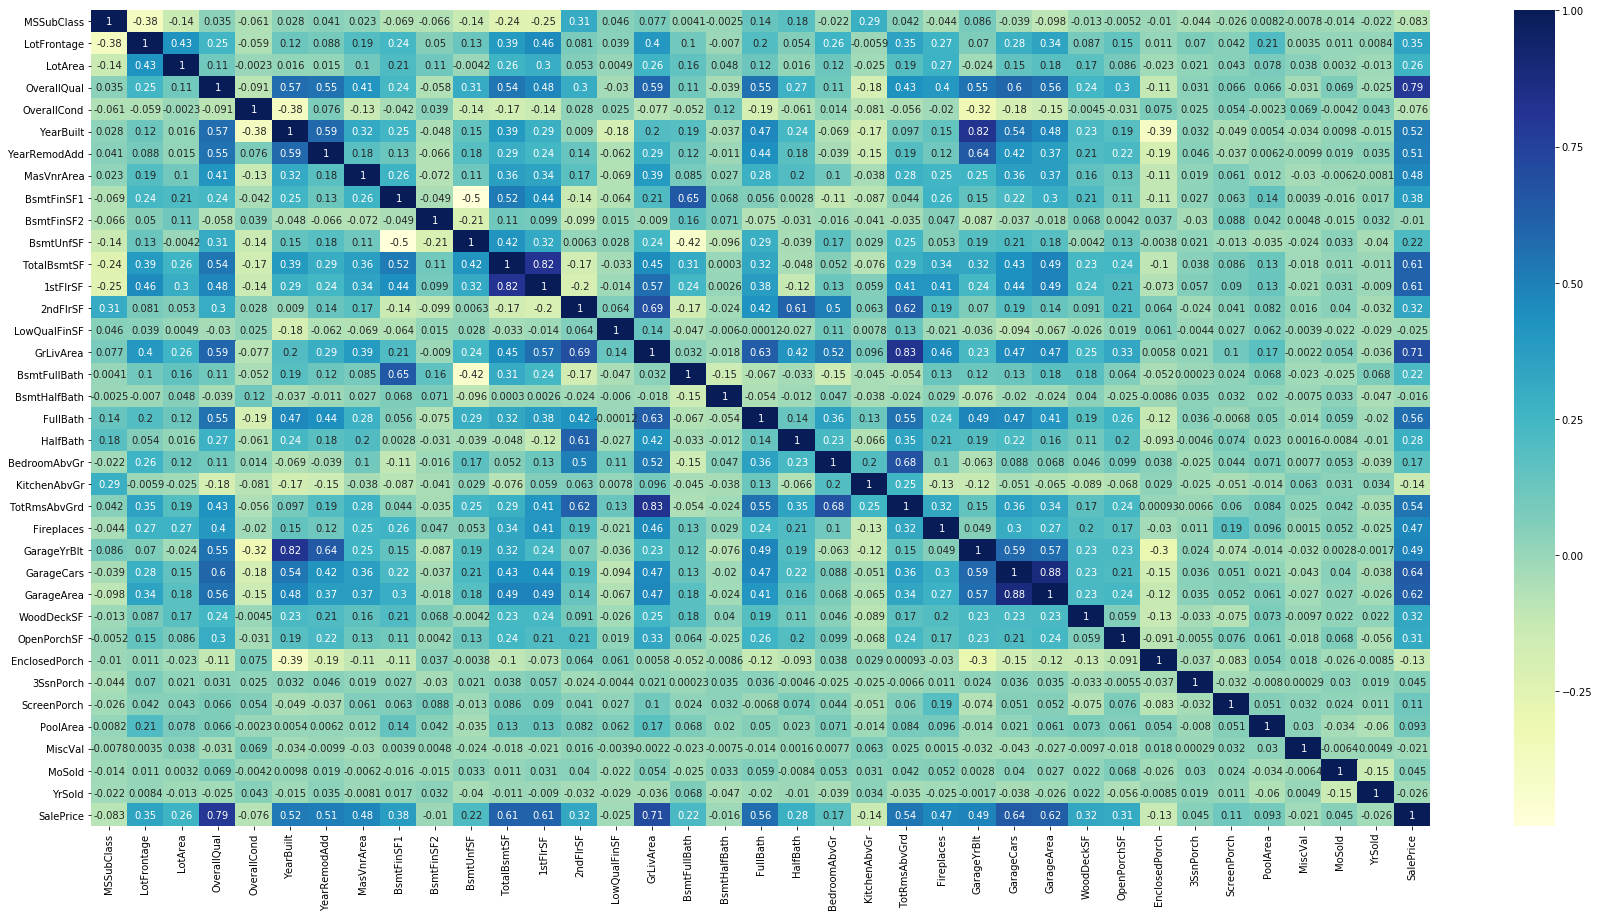

In [36]:
# Figure size
plt.figure(figsize=(30,15))

# Heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

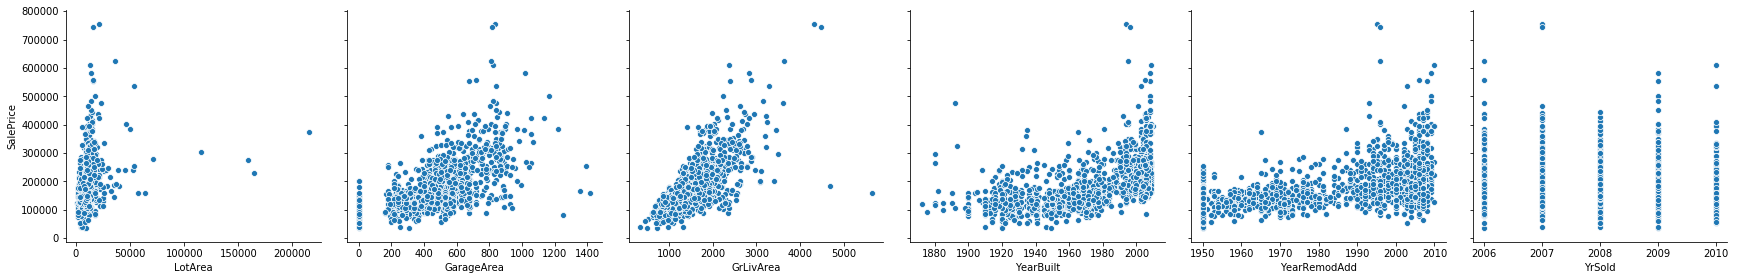

In [37]:
# Lets plot the scatter plot to see the relation between Sale price and other variables
sns.pairplot(housing, x_vars=['LotArea', 'GarageArea', 'GrLivArea','YearBuilt','YearRemodAdd','YrSold'], y_vars='SalePrice',size=4, aspect=1, kind='scatter')
plt.show()

The heatmap and scatter plot shows some useful insights:

Correlation of price with independent variables:
- Price is highly (positively) correlated with OverallQual, YearBuilt,YearRemodAdd, TotalBsmtSF,1stFlrSF, GrLivArea, TotRmsAbvGrd, GarageCars,GarageArea 

- Price is negatively correlated to OverallCond and KitchenAbvGr,EnclosedPorch (-0.10 approximately). 

Correlation among independent variables:
- Many independent variables are highly correlated 

Thus, while building the model, we'll have to pay attention to multicollinearity.

### 1.2.1 Outlier treatment 

In [38]:
# As the LotFrontage column has 17% missing value lets impute it using mean 70.027638
housing['LotFrontage'].mean()
housing['GarageYrBlt'].mean()

housing.loc[pd.isnull(housing['LotFrontage']), ['LotFrontage']] = housing['LotFrontage'].mean()  # mean 70.027638
housing.loc[pd.isnull(housing['GarageYrBlt']), ['GarageYrBlt']] = housing['GarageYrBlt'].mean()  # mean 1978

In [39]:
# dropping unnecessary columns
print(housing['LowQualFinSF'].astype('category').value_counts())
print(housing['3SsnPorch'].astype('category').value_counts())
print(housing['PoolArea'].astype('category').value_counts())

# Below are the columns which can be dropped as it has almost 0 value for all the entries 
# and does not impact the analyis
# LowQualFinSF, 3SsnPorch, PoolArea, MoSold

housing.drop(['LowQualFinSF', '3SsnPorch', 'PoolArea','MoSold'],axis = 1,inplace = True)

0      1425
80        3
360       2
528       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
371       1
572       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
513       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64
0      1427
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64
0      1444
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64


In [40]:
# let's look at the statistical aspects of the dataframe
# Checking outliers at 25%,50%,75%,90%,95% and 99%
housing.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,YrSold,SalePrice
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.00000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,56.933150,70.027638,10507.808408,6.093728,5.579600,1971.092350,1984.760165,103.75672,442.274983,46.838043,567.197105,1056.310131,1161.551344,346.742247,1514.174363,0.423846,0.057891,1.562371,0.381116,2.866988,1.046175,6.516885,0.612681,1978.353285,1.764990,472.525155,94.412819,46.422467,21.952447,15.154376,43.758787,2007.815300,180624.101999
std,42.350366,22.040935,9992.987081,1.381467,1.113415,30.190266,20.651334,181.10815,455.369276,161.777324,442.209192,437.914609,385.002532,436.453277,525.799521,0.518842,0.239449,0.550301,0.502574,0.815086,0.219571,1.626576,0.643443,23.986390,0.748728,214.171752,125.436852,66.060150,61.108223,55.917522,497.648467,1.329376,79312.128273
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.00000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7537.500000,5.000000,5.000000,1954.000000,1966.000000,0.00000,0.000000,0.000000,222.000000,795.000000,882.000000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,327.500000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129900.000000
50%,50.000000,70.027638,9477.000000,6.000000,5.000000,1972.000000,1993.000000,0.00000,381.000000,0.000000,479.000000,991.000000,1086.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.353285,2.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,2008.000000,162500.000000
75%,70.000000,79.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,166.00000,707.000000,0.000000,808.000000,1297.500000,1391.000000,728.000000,1776.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
90%,120.000000,92.000000,14375.000000,8.000000,7.000000,2006.000000,2006.000000,335.00000,1064.000000,119.000000,1232.000000,1602.000000,1680.000000,954.000000,2158.000000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.000000,262.000000,130.000000,112.000000,0.000000,0.000000,2010.000000,278000.000000
95%,160.000000,104.000000,17308.500000,8.000000,8.000000,2007.000000,2007.000000,456.00000,1272.000000,398.000000,1468.000000,1749.000000,1827.000000,1141.500000,2464.000000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,849.000000,335.000000,173.000000,180.000000,160.000000,0.000000,2010.000000,325812.000000
99%,190.000000,137.500000,37802.000000,10.000000,9.000000,2009.000000,2009.000000,792.00000,1572.500000,832.000000,1797.500000,2155.500000,2212.000000,1420.000000,3126.000000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,2009.000000,3.000000,1004.500000,506.000000,286.000000,261.500000,268.500000,700.000000,2010.000000,439390.000000


In [41]:
# All the 3 columns have outlier LotArea/MasVnrArea/TotalBsmtSF,2ndFlrSF,BsmtFinSF2,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
# As we can see that there is lot of difference in values at 99% and max value

print(housing.shape)

# outlier treatment for LotArea
Q1 = housing.LotArea.quantile(0.00)
Q3 = housing.LotArea.quantile(0.99)
IQR = Q3 - Q1
housing = housing[(housing.LotArea >= Q1 - 1.5*IQR) & (housing.LotArea <= Q3 + 1.5*IQR)]

Q1 = housing.MasVnrArea.quantile(0.00)
Q3 = housing.MasVnrArea.quantile(0.99)
IQR = Q3 - Q1
housing = housing[(housing.MasVnrArea >= Q1 - 1.5*IQR) & (housing.MasVnrArea <= Q3 + 1.5*IQR)]
print(housing.shape)

Q1 = housing.TotalBsmtSF.quantile(0.00)
Q3 = housing.TotalBsmtSF.quantile(0.99)
IQR = Q3 - Q1
housing = housing[(housing.TotalBsmtSF >= Q1 - 1.5*IQR) & (housing.TotalBsmtSF <= Q3 + 1.5*IQR)]

Q1 = housing['2ndFlrSF'].quantile(0.00)
Q3 = housing['2ndFlrSF'].quantile(0.99)
IQR = Q3 - Q1
housing = housing[(housing['2ndFlrSF'] >= Q1 - 1.5*IQR) & (housing['2ndFlrSF'] <= Q3 + 1.5*IQR)]

Q1 = housing.BsmtFinSF2.quantile(0.00)
Q3 = housing.BsmtFinSF2.quantile(0.99)
IQR = Q3 - Q1
housing = housing[(housing.BsmtFinSF2 >= Q1 - 1.5*IQR) & (housing.BsmtFinSF2 <= Q3 + 1.5*IQR)]

Q1 = housing.WoodDeckSF.quantile(0.00)
Q3 = housing.WoodDeckSF.quantile(0.99)
IQR = Q3 - Q1
housing = housing[(housing.WoodDeckSF >= Q1 - 1.5*IQR) & (housing.WoodDeckSF <= Q3 + 1.5*IQR)]


Q1 = housing.OpenPorchSF.quantile(0.00)
Q3 = housing.OpenPorchSF.quantile(0.99)
IQR = Q3 - Q1
housing = housing[(housing.OpenPorchSF >= Q1 - 1.5*IQR) & (housing.OpenPorchSF <= Q3 + 1.5*IQR)]

Q1 = housing.EnclosedPorch.quantile(0.00)
Q3 = housing.EnclosedPorch.quantile(0.99)
IQR = Q3 - Q1
housing = housing[(housing.EnclosedPorch >= Q1 - 1.5*IQR) & (housing.EnclosedPorch <= Q3 + 1.5*IQR)]

Q1 = housing.ScreenPorch.quantile(0.00)
Q3 = housing.ScreenPorch.quantile(0.99)
IQR = Q3 - Q1
housing = housing[(housing.ScreenPorch >= Q1 - 1.5*IQR) & (housing.ScreenPorch <= Q3 + 1.5*IQR)]

(1451, 71)
(1447, 71)


## 1.3 Analysing and Cleaning the Categorical data
- Binary 
- Ordinal
- non ordinal categories

### 1.3.1 Unvariate analysis of Categorical column

In [42]:
# Binary category
print(housing['CentralAir'].value_counts()) 

# Non Ordinal Categories
print(housing['Street'].value_counts()) #Street -Pave    1445/Grvl 6 . Can be Dropped
print(housing['LandContour'].value_counts())   
print(housing['Utilities'].value_counts())  # Utilities -AllPub 1450 /NoSeWa 1  - can be Dropped
print(housing['LotConfig'].value_counts())   
print(housing['Neighborhood'].value_counts())
print(housing['Condition1'].value_counts()) 
print(housing['Condition2'].value_counts()) #Condition2  -- Norm  1436/ others 15 can be Dropped
print(housing['RoofStyle'].value_counts())  # 
print(housing['RoofMatl'].value_counts()) # RoofMatl -- CompShg  1425 /other 23 Should be Dropped
print(housing['Exterior1st'].value_counts()) 
print(housing['Exterior2nd'].value_counts()) 
print(housing['MasVnrType'].value_counts())  
print(housing['Foundation'].value_counts())  
print(housing['Heating'].value_counts()) 
print(housing['Electrical'].value_counts()) 
print(housing['GarageType'].value_counts())  
print(housing['SaleType'].value_counts()) 
print(housing['SaleCondition'].value_counts()) 

# Ordinal Category

#MSZoning, LotShape, LandSlope, ExterQual,ExterCond,
#BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,
#HeatingQC,KitchenQual,Functional,GarageFinish,GarageQual,
#GarageCond,PavedDrive,BldgType,HouseStyle,
    
print(housing['MSZoning'].value_counts())  
print(housing['LotShape'].value_counts())  
print(housing['LandSlope'].value_counts()) 
print(housing['ExterQual'].value_counts())  
print(housing['ExterCond'].value_counts())  
print(housing['BsmtQual'].value_counts()) 
print(housing['BsmtCond'].value_counts()) 
print(housing['BsmtExposure'].value_counts()) 
print(housing['BsmtFinType1'].value_counts()) 
print(housing['BsmtFinType2'].value_counts()) 
print(housing['HeatingQC'].value_counts())  
print(housing['KitchenQual'].value_counts())  
print(housing['Functional'].value_counts()) 
print(housing['GarageFinish'].value_counts()) 
print(housing['GarageQual'].value_counts())
print(housing['GarageCond'].value_counts())
print(housing['PavedDrive'].value_counts())
print(housing['BldgType'].value_counts()) 
print(housing['HouseStyle'].value_counts()) 

Y    1351
N      95
Name: CentralAir, dtype: int64
Pave    1441
Grvl       5
Name: Street, dtype: int64
Lvl    1302
Bnk      62
HLS      49
Low      33
Name: LandContour, dtype: int64
AllPub    1445
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1044
Corner      260
CulDSac      91
FR2          47
FR3           4
Name: LotConfig, dtype: int64
NAmes      225
CollgCr    149
OldTown    113
Edwards     99
Somerst     83
Gilbert     78
NridgHt     76
Sawyer      74
NWAmes      73
SawyerW     58
BrkSide     58
Crawfor     50
Mitchel     49
NoRidge     41
IDOTRR      37
Timber      35
ClearCr     26
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Norm      1247
Feedr       80
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
Norm      1431
Feedr        6
Artery       2
PosN         2
RRNn        

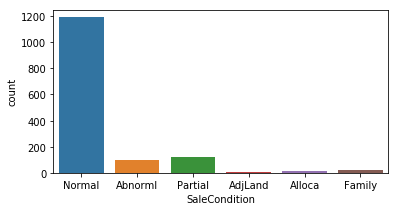

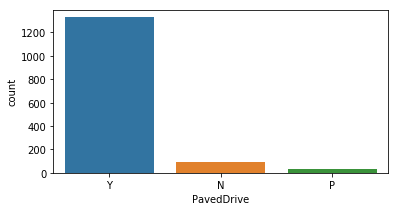

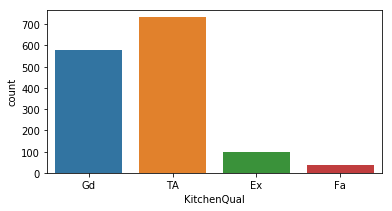

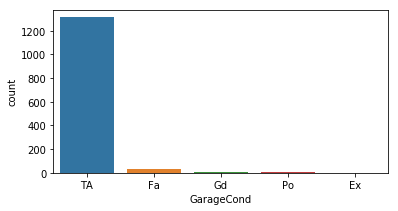

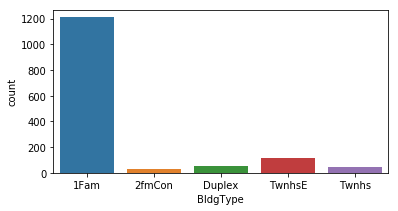

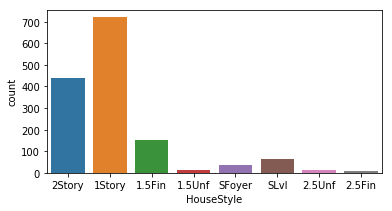

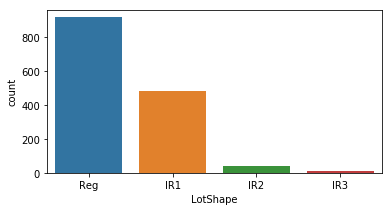

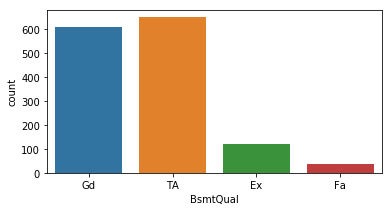

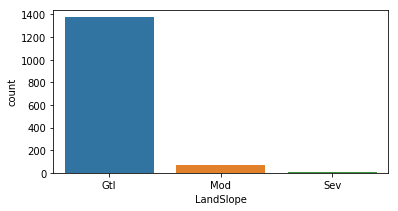

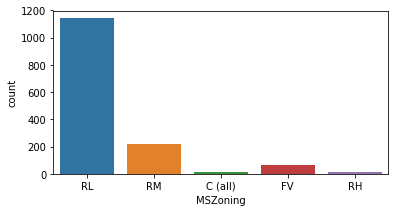

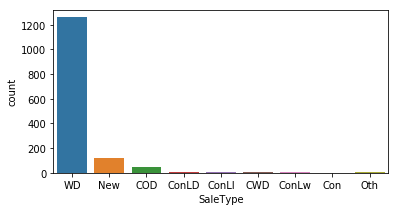

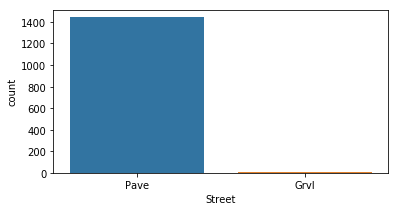

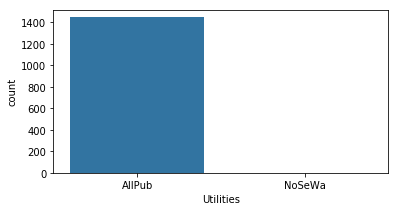

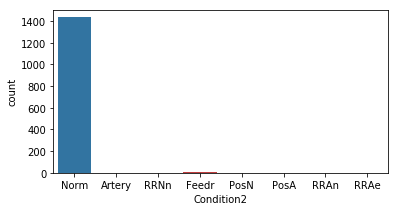

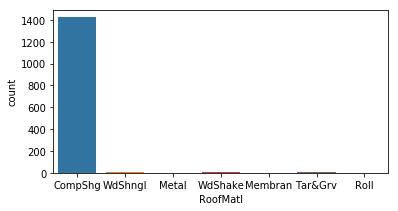

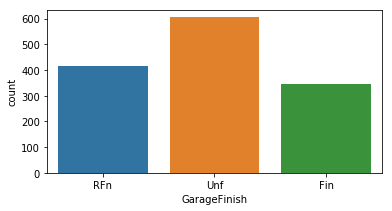

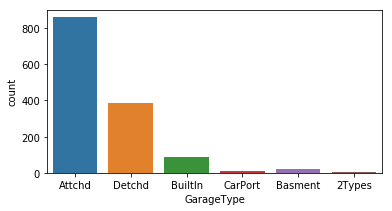

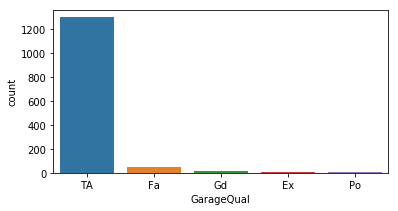

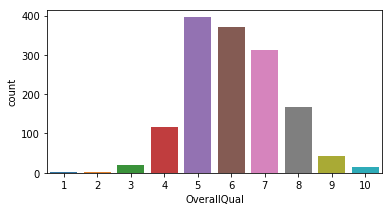

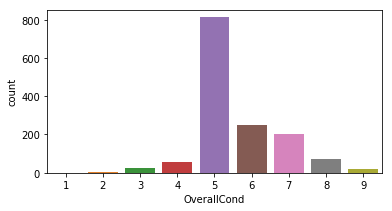

In [43]:
# Unvariate analysis of Categorical column
plt.figure(figsize=(6,3))
sns.countplot(x='SaleCondition', data=housing)
plt.show()

plt.figure(figsize=(6, 3))
sns.countplot(x='PavedDrive', data=housing)
plt.show()

plt.figure(figsize=(6, 3))
sns.countplot(x='KitchenQual', data=housing)
plt.show()

plt.figure(figsize=(6, 3))
sns.countplot(x='GarageCond', data=housing)
plt.show()

plt.figure(figsize=(6, 3))
sns.countplot(x='BldgType', data=housing)
plt.show()

plt.figure(figsize=(6, 3))
sns.countplot(x='HouseStyle', data=housing)
plt.show()

  
plt.figure(figsize=(6, 3))
sns.countplot(x='LotShape', data=housing)
plt.show()

plt.figure(figsize=(6, 3))
sns.countplot(x='BsmtQual', data=housing)
plt.show()

plt.figure(figsize=(6, 3))
sns.countplot(x='LandSlope', data=housing)
plt.show()

plt.figure(figsize=(6, 3))
sns.countplot(x='MSZoning', data=housing)
plt.show()

plt.figure(figsize=(6, 3))
sns.countplot(x='SaleType', data=housing)
plt.show()

plt.figure(figsize=(6, 3))
sns.countplot(x='Street', data=housing)
plt.show()

plt.figure(figsize=(6, 3))
sns.countplot(x='Utilities', data=housing)
plt.show()

plt.figure(figsize=(6, 3))
sns.countplot(x='Condition2', data=housing)
plt.show()

plt.figure(figsize=(6, 3))
sns.countplot(x='RoofMatl', data=housing)
plt.show()

plt.figure(figsize=(6, 3))
sns.countplot(x='GarageFinish', data=housing)
plt.show()

 
plt.figure(figsize=(6, 3))
sns.countplot(x='GarageType', data=housing)
plt.show()

plt.figure(figsize=(6, 3))
sns.countplot(x='GarageQual', data=housing)
plt.show()

plt.figure(figsize=(6, 3))
sns.countplot(x='OverallQual', data=housing)
plt.show()

plt.figure(figsize=(6, 3))
sns.countplot(x='OverallCond', data=housing)
plt.show()

### Observation: 
        
**Following fields are significant**
- SaleCondition
    - 'Normal'  Normal Sale
- PavedDrive
    - 'Y' path is Paved for most houses
- KitchenQual
    - 'TA' Typical/Average KitchenQual formost houses
- GarageCond
    - 'TA' Typical/Average GarageCond for most houses
- BldgType
    - '1FM'   Most of the houses are of type Single-family Detached
- HouseStyle
    - '1story/2story' Most of the houses are 1story and 2 story building
- LotShape
    - 'Regular' Most of the houses have Regular shape
- BsmtQual
    - 'TA' Typical (80-89 inches)
- LandSlope
    - 'Gentle slope' Most of the houses have mild slop
- MSZoning
    - 'Residential Low Density'  Most of the property lies in area of low dense population means outskirts
- SaleType
    - 'Warranty Deed - Conventional' is common
- GarageFinish
    - 'Unfinished'
- GarageType
    - 'Attached' Most of the houses have Attached garage
- GarageQual
    - 'TA' Typical/Average
- OverallQual
    - '5,6,7' Most of the houses have Average/above avg/good overall quality
- OverallCond
    - '5-Average' Most of the houses have Average overall condition


### 1.3.2 Bivariate analysis of categorical variable

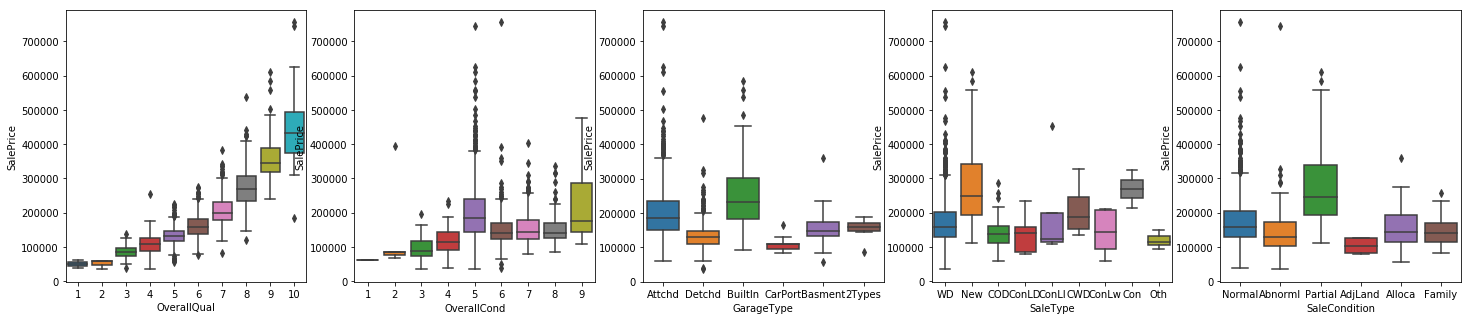

In [44]:
plt.figure(figsize=(25, 5))

plt.subplot(1, 5, 1)
sns.boxplot(x='OverallQual', y='SalePrice', data=housing)

plt.subplot(1, 5, 2)
sns.boxplot(x='OverallCond', y='SalePrice', data=housing)
 
plt.subplot(1, 5, 3)
sns.boxplot(x='GarageType', y='SalePrice', data=housing)

plt.subplot(1, 5, 4)
sns.boxplot(x='SaleType', y='SalePrice', data=housing)

plt.subplot(1, 5, 5)
sns.boxplot(x='SaleCondition', y='SalePrice', data=housing)
plt.show()


## Observation:
**Following fields are significant**
- OverallQual
    - Sale price increases with overall Quality
- OverallCond
    - Sale price increases with overall condition but most of the houses are in Average condition
- GarageType
    - builtin/Attached Garage are more preferred and sale price is high for these 2 categories
- SaleType
    - "New" Home just constructed and sold will have more price
- SaleCondition
    - Partial/Normal Newly built(partially/fully constructed) house have more sale price then the old ones

In [45]:
# Based on above analysis 

#Drop the columns with less then 1% significant data  #Street/Utilities/Condition2/RoofMatl
housing.drop(['Street','Utilities','Condition2','RoofMatl'],axis = 1,inplace = True)

In [46]:
# Based on above analysis , Need to impute the below categorical columns with mode value and random values

#using mode values for imputing categorical variable 
housing.loc[pd.isnull(housing['BsmtQual']), ['BsmtQual']] = 'TA'  # mode is TA
housing.loc[pd.isnull(housing['BsmtCond']), ['BsmtCond']] = 'TA'  # mode is TA
housing.loc[pd.isnull(housing['BsmtExposure']), ['BsmtExposure']] = 'No'  # mode is No
housing.loc[pd.isnull(housing['BsmtFinType1']), ['BsmtFinType1']] = 'Unf'  # mode is Unf
housing.loc[pd.isnull(housing['BsmtFinType2']), ['BsmtFinType2']] = 'Unf'  # mode is Unf
housing.loc[pd.isnull(housing['GarageType']), ['GarageType']] = 'Attchd'  # mode is Attchd
housing.loc[pd.isnull(housing['GarageFinish']), ['GarageFinish']] = 'Unf'  # mode is Unf
housing.loc[pd.isnull(housing['GarageQual']), ['GarageQual']] = 'TA'  # mode is TA
housing.loc[pd.isnull(housing['GarageCond']), ['GarageCond']] = 'TA'  # mode is TA

In [47]:
# Non Ordinal Categories: Combining the categories based on frequency
# Neighborhood 
series = pd.value_counts(housing['Neighborhood'])
mask = (series/series.sum() * 100).lt(5)  # having freq less then 10%
# To replace df['column'] use np.where I.e 
housing['Neighborhood'] = np.where(housing['Neighborhood'].isin(series[mask].index),'NeighborhoodOthers',housing['Neighborhood'])
print(housing['Neighborhood'].value_counts())

# Exterior1st 
series = pd.value_counts(housing['Exterior1st'])
mask = (series/series.sum() * 100).lt(5)  # having freq less then 10%
# To replace df['column'] use np.where I.e 
housing['Exterior1st'] = np.where(housing['Exterior1st'].isin(series[mask].index),'Exterior1stOthers',housing['Exterior1st'])
print(housing['Exterior1st'].value_counts())

# Exterior2nd 
series = pd.value_counts(housing['Exterior2nd'])
mask = (series/series.sum() * 100).lt(5)  # having freq less then 10%
# To replace df['column'] use np.where I.e 
housing['Exterior2nd'] = np.where(housing['Exterior2nd'].isin(series[mask].index),'Exterior2ndOthers',housing['Exterior2nd'])
print(housing['Exterior2nd'].value_counts())


# Heating 
series = pd.value_counts(housing['Heating'])
mask = (series/series.sum() * 100).lt(5)  # having freq less then 10%
# To replace df['column'] use np.where I.e 
housing['Heating'] = np.where(housing['Heating'].isin(series[mask].index),'HeatingOthers',housing['Heating'])
print(housing['Heating'].value_counts())

# RoofStyle 
series = pd.value_counts(housing['RoofStyle'])
mask = (series/series.sum() * 100).lt(5)  # having freq less then 10%
# To replace df['column'] use np.where I.e 
housing['RoofStyle'] = np.where(housing['RoofStyle'].isin(series[mask].index),'RoofStyleOthers',housing['RoofStyle'])
print(housing['RoofStyle'].value_counts())


# Condition1 
series = pd.value_counts(housing['Condition1'])
mask = (series/series.sum() * 100).lt(5)  # having freq less then 10%
# To replace df['column'] use np.where I.e 
housing['Condition1'] = np.where(housing['Condition1'].isin(series[mask].index),'Condition1Others',housing['Condition1'])
print(housing['Condition1'].value_counts())

# LotConfig 
series = pd.value_counts(housing['LotConfig'])
mask = (series/series.sum() * 100).lt(5)  # having freq less then 10%
# To replace df['column'] use np.where I.e 
housing['LotConfig'] = np.where(housing['LotConfig'].isin(series[mask].index),'LotConfigOthers',housing['LotConfig'])
print(housing['LotConfig'].value_counts())

# Electrical 
series = pd.value_counts(housing['Electrical'])
mask = (series/series.sum() * 100).lt(5)  # having freq less then 10%
# To replace df['column'] use np.where I.e 
housing['Electrical'] = np.where(housing['Electrical'].isin(series[mask].index),'ElectricalOthers',housing['Electrical'])
print(housing['Electrical'].value_counts())

# GarageType 
series = pd.value_counts(housing['GarageType'])
mask = (series/series.sum() * 100).lt(5)  # having freq less then 10%
# To replace df['column'] use np.where I.e 
housing['GarageType'] = np.where(housing['GarageType'].isin(series[mask].index),'GarageTypeOthers',housing['GarageType'])
print(housing['GarageType'].value_counts())

#SaleType
series = pd.value_counts(housing['SaleType'])
mask = (series/series.sum() * 100).lt(5)  # having freq less then 10%
# To replace df['column'] use np.where I.e 
housing['SaleType'] = np.where(housing['SaleType'].isin(series[mask].index),'SaleTypeOthers',housing['SaleType'])
print(housing['SaleType'].value_counts())

NeighborhoodOthers    476
NAmes                 225
CollgCr               149
OldTown               113
Edwards                99
Somerst                83
Gilbert                78
NridgHt                76
Sawyer                 74
NWAmes                 73
Name: Neighborhood, dtype: int64
VinylSd              509
HdBoard              222
MetalSd              220
Wd Sdng              204
Exterior1stOthers    185
Plywood              106
Name: Exterior1st, dtype: int64
VinylSd              498
MetalSd              214
HdBoard              206
Wd Sdng              197
Exterior2ndOthers    191
Plywood              140
Name: Exterior2nd, dtype: int64
GasA             1415
HeatingOthers      31
Name: Heating, dtype: int64
Gable              1130
Hip                 283
RoofStyleOthers      33
Name: RoofStyle, dtype: int64
Norm                1247
Condition1Others     119
Feedr                 80
Name: Condition1, dtype: int64
Inside             1044
Corner              260
CulDSac        

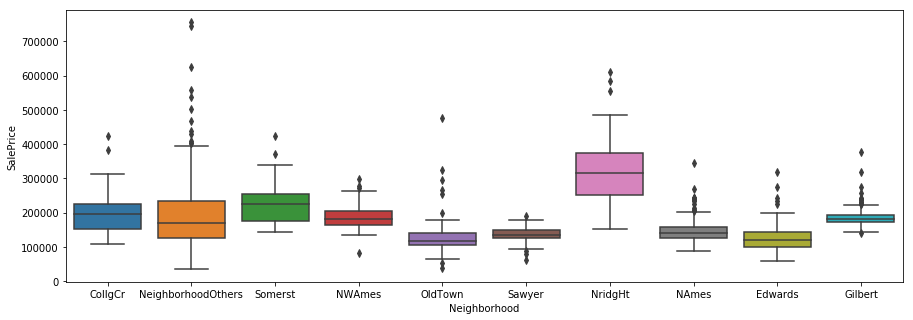

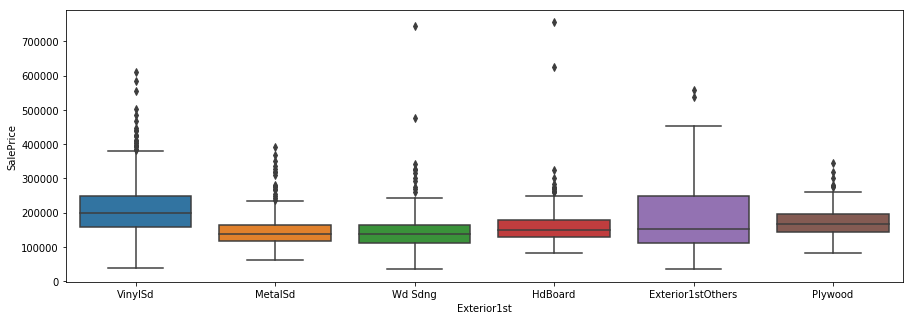

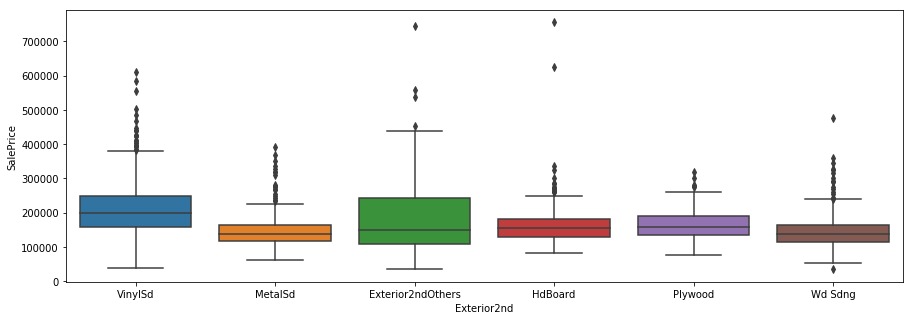

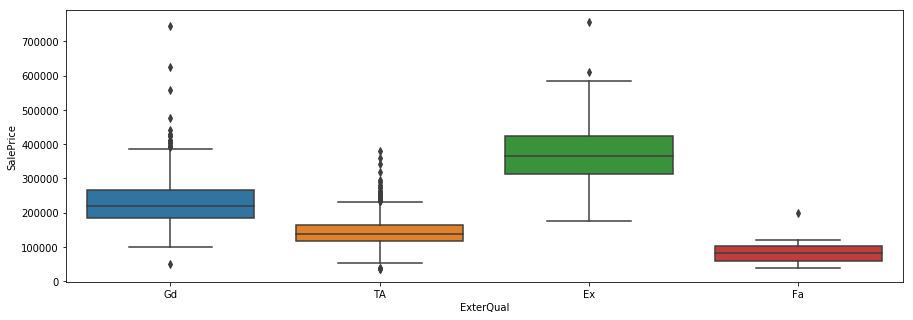

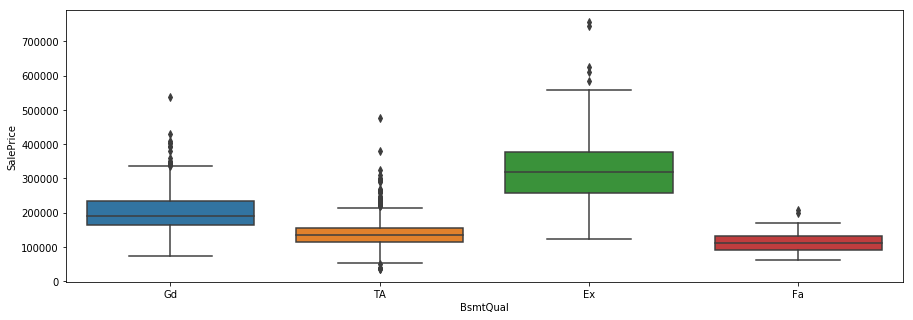

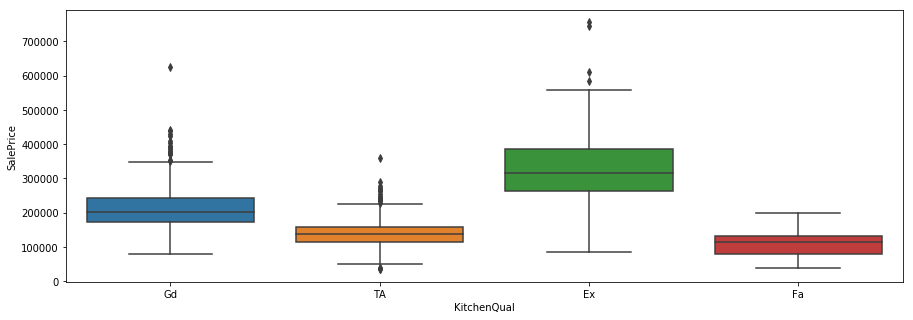

In [48]:

plt.figure(figsize=(15, 5))
sns.boxplot(x='Neighborhood', y='SalePrice', data=housing)
plt.show()


plt.figure(figsize=(15, 5))
sns.boxplot(x='Exterior1st', y='SalePrice', data=housing)
plt.show()

plt.figure(figsize=(15, 5))
sns.boxplot(x='Exterior2nd', y='SalePrice', data=housing)
plt.show()


plt.figure(figsize=(15, 5))
sns.boxplot(x='ExterQual', y='SalePrice', data=housing)
plt.show()


plt.figure(figsize=(15, 5))
sns.boxplot(x='BsmtQual', y='SalePrice', data=housing)
plt.show()

plt.figure(figsize=(15, 5))
sns.boxplot(x='KitchenQual', y='SalePrice', data=housing)
plt.show()



## Observation:
**Following fields are significant**
- Neighborhood
    - NridgeHit/Somerst location has high sale price . Sale price depends on the house location
- Exterior1st
    - Vinyl/Plywood finish has high sale price . Sale price increase as the quality of exterior increase
- Exterior2nd
    - Vinyl/Plywood finish has high sale price . Sale price increase as the quality of exterior increase
- ExterQual
    - "Excellent/Good" Sale price increase as the quality increase
- BsmtQual
    - "Excellent/Good" Sale price increase as the quality increase
- KitchenQual
    - Excellent/Good Sale price increase as the quality increase

In [49]:
# Check the percentage of null values.  
# there are No null values present in the data now. No of columns has reduced to 67
print(housing.shape)
housing.isnull().sum(axis = 0)/len(housing.index)*100

(1446, 67)


MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
LotShape         0.0
LandContour      0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd 

### 1.3.3 Converting Binary variable into 0 and 1

In [50]:
# Binary category

# List of variables to map
varlist =  ['CentralAir']

# Defining the map function
def binary_map(x):
    return x.map({'Y': 1, "N": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing['CentralAir'] =  housing['CentralAir'].astype('object')

### 1.3.4 Label Encoding done for Ordinal categories

In [51]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding done for Ordinal categories

#MSZoning, LotShape, LandSlope, ExterQual,ExterCond,
#BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,
#HeatingQC,KitchenQual,Functional,GarageFinish,GarageQual
#GarageCond,PavedDrive,BldgType,HouseStyle,

categorical_cols = ['MSZoning','LotShape','LandSlope','ExterQual','ExterCond','HeatingQC','KitchenQual','Functional','PavedDrive','BldgType','HouseStyle','GarageFinish','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
              
le = LabelEncoder()#use this encoder to encode values

housing[categorical_cols] = housing[categorical_cols].apply(lambda col: le.fit_transform(col))

### 1.3.5 Creating Dummy Categorical variable for Non Ordinal categories

In [52]:
# Get dummies for below columns

#'LandContour','LotConfig','Neighborhood','Condition1','RoofStyle',
#'Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating',
#'Electrical','GarageType','SaleType','SaleCondition'

housing = pd.get_dummies(housing, prefix_sep='_', drop_first=True)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandSlope,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,YrSold,SalePrice,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_Inside,LotConfig_LotConfigOthers,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NeighborhoodOthers,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,RoofStyle_Hip,RoofStyle_RoofStyleOthers,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_HeatingOthers,CentralAir_1,Electrical_FuseA,Electrical_SBrkr,GarageType_BuiltIn,GarageType_Detchd,GarageType_GarageTypeOthers,SaleType_SaleTypeOthers,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,3,65.0,8450,3,0,0,5,7,5,2003,2003,196.0,2,4,2,3,3,2,706,5,0,150,856,0,856,854,1710,1,0,2,1,3,1,2,8,6,0,2003.0,1,2,548,4,4,2,0,61,0,0,0,2008,208500,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
1,20,3,80.0,9600,3,0,0,2,6,8,1976,1976,0.0,3,4,2,3,1,0,978,5,0,284,1262,0,1262,0,1262,0,1,2,0,3,1,3,6,6,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,2007,181500,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
2,60,3,68.0,11250,0,0,0,5,7,5,2001,2002,162.0,2,4,2,3,2,2,486,5,0,434,920,0,920,866,1786,1,0,2,1,3,1,2,6,6,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,2008,223500,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
3,70,3,60.0,9550,0,0,0,5,7,5,1915,1970,0.0,3,4,3,1,3,0,216,5,0,540,756,2,961,756,1717,1,0,1,0,3,1,2,7,6,1,1998.0,2,3,642,4,4,2,0,35,272,0,0,2006,140000,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0
4,60,3,84.0,14260,0,0,0,5,8,5,2000,2000,350.0,2,4,2,3,0,2,655,5,0,490,1145,0,1145,1053,2198,1,0,2,1,4,1,2,9,6,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,2008,250000,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0


In [53]:
# Columns have increase from 67 to 161 after Dummy creation
#housing.shape

housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1446 entries, 0 to 1459
Columns: 103 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(49), uint8(51)
memory usage: 710.8 KB


###  2: Test-Train Split

In [54]:
scaler = StandardScaler()
num_vars =['MSSubClass', 'MSZoning','LotFrontage', 'LotArea','LotShape', 'LandSlope', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF','GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional','Fireplaces', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 
           'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch','MiscVal', 'YrSold']

housing[num_vars] = scaler.fit_transform(housing[num_vars])
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandSlope,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,YrSold,SalePrice,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_Inside,LotConfig_LotConfigOthers,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NeighborhoodOthers,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,RoofStyle_Hip,RoofStyle_RoofStyleOthers,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_HeatingOthers,CentralAir_1,Electrical_FuseA,Electrical_SBrkr,GarageType_BuiltIn,GarageType_Detchd,GarageType_GarageTypeOthers,SaleType_SaleTypeOthers,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073509,-0.052852,-0.228557,-0.293106,0.749741,-0.222498,-0.412332,1.026716,0.659544,-0.520242,1.056333,0.884232,0.516626,-0.790855,0.366202,-0.329164,0.281141,0.627017,-0.430264,0.620986,0.306963,-0.288339,-0.944584,-0.468597,-0.886616,-0.808871,1.162358,0.388389,1.127008,-0.240693,0.797776,1.230103,0.163703,-0.210749,-0.414933,0.917469,0.256114,-0.953090,1.026447,-0.291160,0.314584,0.358513,0.216736,0.186949,0.291262,-0.754676,0.223711,-0.360064,-0.271609,-0.086526,0.138782,208500,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
1,-0.873428,-0.052852,0.485044,-0.082125,0.749741,-0.222498,-0.412332,-0.544322,-0.065704,2.172850,0.162696,-0.423575,-0.572129,0.660384,0.366202,-0.329164,0.281141,-1.128388,-1.517960,1.248566,0.306963,-0.288339,-0.641702,0.506603,-0.886616,0.280227,-0.794322,-0.482129,-0.817686,3.952585,0.797776,-0.759527,0.163703,-0.210749,0.792296,-0.316060,0.256114,0.616577,-0.098788,-0.291160,0.314584,-0.054855,0.216736,0.186949,0.291262,1.641245,-0.703359,-0.360064,-0.271609,-0.086526,-0.612823,181500,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
2,0.073509,-0.052852,-0.085837,0.220587,-1.377385,-0.222498,-0.412332,1.026716,0.659544,-0.520242,0.990138,0.835795,0.327760,-0.790855,0.366202,-0.329164,0.281141,-0.250685,-0.430264,0.113385,0.306963,-0.288339,-0.302655,-0.314871,-0.886616,-0.637190,1.189852,0.536067,1.127008,-0.240693,0.797776,1.230103,0.163703,-0.210749,-0.414933,-0.316060,0.256114,0.616577,0.943096,-0.291160,0.314584,0.640355,0.216736,0.186949,0.291262,-0.754676,-0.065048,-0.360064,-0.271609,-0.086526,0.138782,223500,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
3,0.310243,-0.052852,-0.466424,-0.091298,-1.377385,-0.222498,-0.412332,1.026716,0.659544,-0.520242,-1.856263,-0.714199,-0.572129,0.660384,0.366202,0.828916,-2.787006,0.627017,-1.517960,-0.509580,0.306963,-0.288339,-0.063062,-0.708794,0.263202,-0.527207,0.937821,0.401991,1.127008,-0.240693,-1.018892,-0.759527,0.163703,-0.210749,-0.414933,0.300705,0.256114,0.616577,0.818070,0.943496,1.648565,0.800065,0.216736,0.186949,0.291262,-0.754676,-0.171433,4.085905,-0.271609,-0.086526,-1.364428,140000,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0
4,0.073509,-0.052852,0.675337,0.772807,-1.377385,-0.22249

In [55]:
# Putting feature variable to X
X = housing.drop(['SalePrice'], axis=1)
X.head()
# Putting response variable to y
y = housing['SalePrice']
y.tail()

1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, dtype: int64

In [56]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [57]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandSlope,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,YrSold,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_Inside,LotConfig_LotConfigOthers,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NeighborhoodOthers,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,RoofStyle_Hip,RoofStyle_RoofStyleOthers,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_HeatingOthers,CentralAir_1,Electrical_FuseA,Electrical_SBrkr,GarageType_BuiltIn,GarageType_Detchd,GarageType_GarageTypeOthers,SaleType_SaleTypeOthers,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
409,0.073509,-3.237210,0.722911,0.138029,0.749741,-0.222498,-0.412332,1.026716,1.384792,-0.520242,1.188724,1.126419,-0.016642,-0.790855,0.366202,-2.645323,0.281141,0.627017,-0.430264,0.812490,0.306963,-0.288339,-0.729854,-0.041046,-0.886616,-0.288464,1.561026,1.103458,1.127008,-0.240693,0.797776,1.230103,0.163703,-0.210749,-2.829389,0.917469,0.256114,0.616577,1.234824,-1.525817,1.648565,1.711353,0.216736,0.186949,0.291262,-0.754676,0.846824,-0.360064,-0.271609,-0.086526,0.138782,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
45,1.493914,-0.052852,-0.418850,-0.438408,0.749741,-0.222498,2.923232,-0.544322,2.110039,-0.520242,1.122529,0.981107,1.716478,-3.693335,0.366202,-2.645323,0.281141,0.627017,-0.430264,0.044167,0.306963,-0.288339,1.645734,1.683569,-0.886616,1.594657,-0.794322,0.470000,1.127008,-0.240693,0.797776,-0.759527,-1.062799,-0.210749,-2.829389,-0.316060,0.256114,0.616577,1.109798,-0.291160,0.314584,0.490039,0.216736,0.186949,0.291262,0.821165,0.542867,-0.360064,-0.271609,-0.086526,1.641992,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
1162,-0.873428,-0.052852,1.864672,-0.242838,0.749741,-0.222498,-0.412332,-0.544322,-0.790951,-0.520242,-0.102086,-0.811074,-0.572129,0.660384,0.366202,-0.329164,0.281141,0.627017,-0.974112,0.127229,0.306963,-0.288339,-0.374985,-0.377322,0.263202,-0.706936,-0.794322,-1.197198,-0.817686,-0.240693,-1.018892,-0.759527,0.163703,-0.210749,0.792296,-0.932824,0.256114,0.616577,-0.432191,-1.525817,0.314584,-0.101828,0.216736,0.186949,0.291262,-0.754676,-0.703359,-0.360064,-0.271609,-0.086526,-0.612823,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
1371,0.546977,-0.052852,0.485044,-0.082125,0.749741,-0.222498,-0.412332,2.074074,-0.065704,0.377455,-0.532355,0.545171,-0.572129,0.660384,0.366202,0.828916,0.281141,-2.006090,-0.974112,0.909396,0.306963,-0.288339,-0.919720,-0.141929,0.263202,1.350548,-0.794322,0.293176,1.127008,-0.240693,-1.018892,-0.759527,0.163703,-0.210749,-0.414933,0.917469,0.256114,0.616577,-0.973970,-0.291160,-1.019398,-0.444735,0.216736,0.186949,0.291262,-0.754676,-0.277818,-0.360064,2.907661,-0.086526,0.138782,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0
523,0.073509,-0.052852,2.863713,5.512360,-1.377385,-0.222498,-0.412332,1.026716,2.83528

### 3.1 Linear regression 

In [58]:
# Step -4
# first model with an arbitrary choice of n_features
# running RFE with number of features=10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=35)             
rfe = rfe.fit(X_train, y_train)

# Step -5
# predict prices of X_train
y_train_pred = rfe.predict(X_train)
r2 = sklearn.metrics.r2_score(y_train, y_train_pred)
print('train r2 score',r2)


# evaluate the model on test set ,predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print('test r2 score',r2)

# tuples of (feature name, whether selected, ranking)
# note that the 'rank' is > 1 for non-selected features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

train r2 score 0.8794053889075119
test r2 score 0.8341207172108955


[('MSSubClass', False, 30),
 ('MSZoning', False, 67),
 ('LotFrontage', False, 62),
 ('LotArea', True, 1),
 ('LotShape', False, 60),
 ('LandSlope', False, 37),
 ('BldgType', False, 4),
 ('HouseStyle', False, 51),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 59),
 ('MasVnrArea', False, 21),
 ('ExterQual', True, 1),
 ('ExterCond', False, 38),
 ('BsmtQual', False, 11),
 ('BsmtCond', False, 49),
 ('BsmtExposure', False, 32),
 ('BsmtFinType1', False, 57),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 68),
 ('BsmtFinSF2', False, 56),
 ('BsmtUnfSF', False, 48),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 39),
 ('1stFlrSF', False, 19),
 ('2ndFlrSF', False, 27),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 18),
 ('BsmtHalfBath', False, 64),
 ('FullBath', False, 53),
 ('HalfBath', False, 50),
 ('BedroomAbvGr', False, 66),
 ('KitchenAbvGr', False, 16),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', False, 28),
 ('Functional', 

#### 3.1 Tuning hyper parameter using RFE

In [59]:
# try with another value of RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=20)             
rfe = rfe.fit(X_train, y_train)


# predict prices of X_train
y_train_pred = rfe.predict(X_train)
r2 = sklearn.metrics.r2_score(y_train, y_train_pred)
print('train r2 score',r2)

# evaluate the model on test set ,predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print('test r2 score',r2)

train r2 score 0.8428956943551174
test r2 score 0.8112545967427851


### Observation Optimal no. of features are 20 and we increase the no. of features r2 score first become constant and then start dropping

### 3.2. K- fold cross validaion

In [60]:
# number of features in X_train
len(X_train.columns)

102

In [61]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1,len(X_train.columns)))}]

###  3.2.1 Multiple Linear regression

In [62]:
#### Lets use Range of hyperparameter RFE to find the optimal no. of features

# step-3: perform grid search
# 3.1 specify model
lm1 = LinearRegression()
lm1.fit(X_train, y_train)
rfe1 = RFE(lm1)             

# 3.2 call GridSearchCV()
model_cv1 = GridSearchCV(estimator = rfe1, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv1.fit(X_train, y_train)                  


Fitting 5 folds for each of 101 candidates, totalling 505 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 505 out of 505 | elapsed:  1.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=None, step=1, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [63]:
# cv results
cv_results = pd.DataFrame(model_cv1.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.245780,0.012435,0.001501,0.000511,1,{'n_features_to_select': 1},0.663167,0.682691,0.241490,0.592270,0.090554,0.454467,0.241793,94,0.638259,0.634122,0.178996,0.655566,0.220793,0.465547,0.217426
1,0.234098,0.002873,0.001220,0.000013,2,{'n_features_to_select': 2},0.680194,0.703744,0.695969,0.629725,0.605129,0.663010,0.038714,91,0.663417,0.658246,0.656548,0.675512,0.680866,0.666918,0.009627
2,0.233538,0.002310,0.001233,0.000031,3,{'n_features_to_select': 3},0.688104,0.686404,0.700298,0.637282,0.578352,0.658146,0.045306,92,0.669421,0.674772,0.663591,0.681645,0.697183,0.677322,0.011581
3,0.232867,0.003451,0.001239,0.000026,4,{'n_features_to_select': 4},0.688869,0.688385,0.700469,0.637184,0.571610,0.657365,0.048085,93,0.669553,0.680502,0.663840,0.682018,0.702040,0.679591,0.013111
4,0.231464,0.002282,0.001221,0.000005,5,{'n_features_to_select': 5},0.793948,0.688379,0.699190,0.752387,0.572988,0.701457,0.074588,90,0.763326,0.681038,0.665191,0.773821,0.787729,0.734221,0.050739


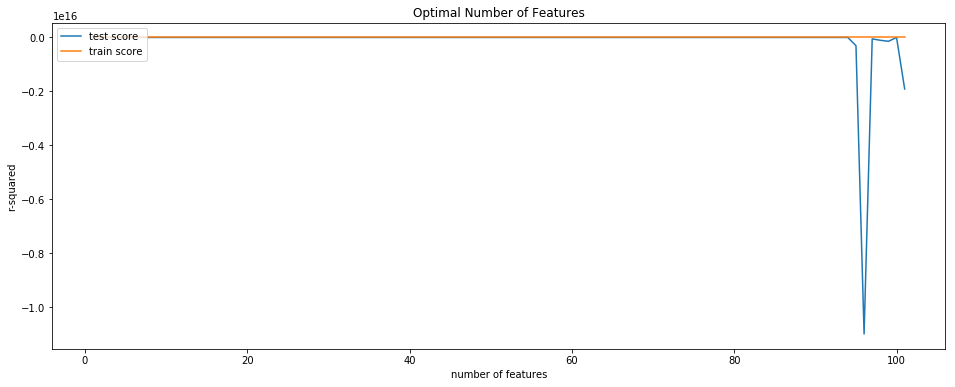

In [64]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [65]:
model_cv1.best_params_

{'n_features_to_select': 94}

In [66]:

# final model
n_features_optimal = model_cv1.best_params_['n_features_to_select']

lm2 = LinearRegression()
lm2.fit(X_train, y_train)

rfe = RFE(lm2, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_train_pred = lm.predict(X_train)
r2 = sklearn.metrics.r2_score(y_train, y_train_pred)
print('train r2 score',r2)


# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print('test r2 score',r2)


train r2 score 0.900084736511957
test r2 score 0.8438978339212659


### 3.2.2 Ridge and Lasso Regression

Let's now try predicting House Sale prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [67]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000,2000,3000,4000 ]}


ridge = Ridge()

# cross validation

model_cv2 = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv2.fit(X_train, y_train) 

Fitting 5 folds for each of 31 candidates, totalling 155 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 155 out of 155 | elapsed:    1.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000, 2000, 3000, 4000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [68]:
cv_results = pd.DataFrame(model_cv2.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004194,0.001104,0.002787,0.003402,0.0001,{'alpha': 0.0001},0.902956,0.884021,0.872751,0.876528,0.694846,0.846314,0.076354,27,0.895001,0.899052,0.898813,0.900406,0.929895,0.904633,0.012758
1,0.003499,0.000162,0.003474,0.004744,0.001,{'alpha': 0.001},0.902955,0.884025,0.872825,0.876533,0.694855,0.846332,0.076356,26,0.895001,0.899052,0.898813,0.900406,0.929895,0.904633,0.012758
2,0.004082,0.000872,0.001511,0.000591,0.01,{'alpha': 0.01},0.902943,0.884071,0.873527,0.876579,0.694935,0.846504,0.076380,25,0.895000,0.899051,0.898810,0.900406,0.929894,0.904632,0.012758
3,0.003611,0.000393,0.001311,0.000373,0.05,{'alpha': 0.05},0.902889,0.884265,0.875934,0.876774,0.695285,0.847121,0.076443,24,0.894994,0.899043,0.898751,0.900405,0.929887,0.904616,0.012762
4,0.008286,0.002746,0.002275,0.001046,0.1,{'alpha': 0.1},0.902826,0.884494,0.877883,0.876998,0.695699,0.847671,0.076459,23,0.894976,0.899023,0.898631,0.900401,0.929867,0.904580,0.012770


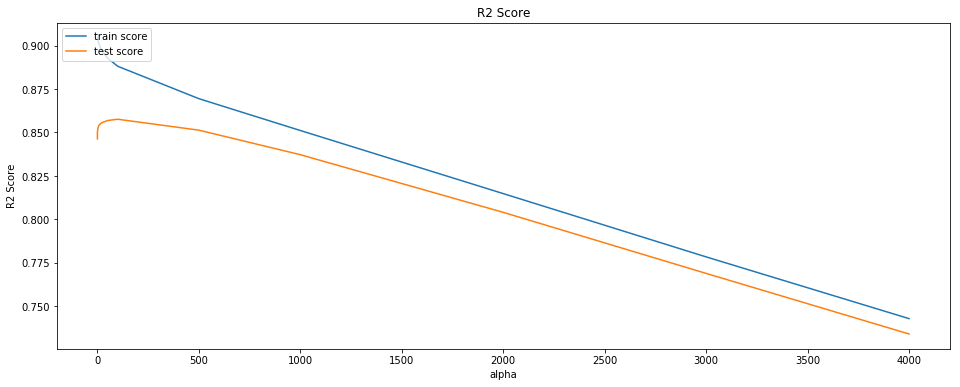

In [69]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,6))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [70]:
model_cv2.best_params_

{'alpha': 100}

In [71]:
alpha = model_cv2.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

# predict prices of X_test
y_train_pred = ridge.predict(X_train)
r2 = sklearn.metrics.r2_score(y_train, y_train_pred)
print('Train r2 score',r2)

# predict prices of X_test
y_pred = ridge.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print('Test R2 score',r2)


Train r2 score 0.8864029286596737
Test R2 score 0.8506945010633415


In [72]:
# Ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 173621.687),
 ('MSSubClass', -2255.398),
 ('MSZoning', -1409.17),
 ('LotFrontage', -135.326),
 ('LotArea', 4801.911),
 ('LotShape', 337.271),
 ('LandSlope', 1117.656),
 ('BldgType', -1947.383),
 ('HouseStyle', -351.348),
 ('OverallQual', 12212.299),
 ('OverallCond', 5442.369),
 ('YearBuilt', 3943.484),
 ('YearRemodAdd', 1473.018),
 ('MasVnrArea', 4184.829),
 ('ExterQual', -6733.411),
 ('ExterCond', 936.94),
 ('BsmtQual', -6180.344),
 ('BsmtCond', 1231.446),
 ('BsmtExposure', -2142.376),
 ('BsmtFinType1', 426.798),
 ('BsmtFinSF1', 4965.989),
 ('BsmtFinType2', 51.64),
 ('BsmtFinSF2', 340.213),
 ('BsmtUnfSF', -386.257),
 ('TotalBsmtSF', 4890.641),
 ('HeatingQC', -1434.892),
 ('1stFlrSF', 7543.327),
 ('2ndFlrSF', 5907.626),
 ('GrLivArea', 10548.479),
 ('BsmtFullBath', 2710.91),
 ('BsmtHalfBath', -664.707),
 ('FullBath', 1686.366),
 ('HalfBath', 1794.241),
 ('BedroomAbvGr', -1072.442),
 ('KitchenAbvGr', -2809.763),
 ('KitchenQual', -5980.03),
 ('TotRmsAbvGrd', 4917.766),
 ('Fu

ridge picked 102 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Feature importance using ridge Model')

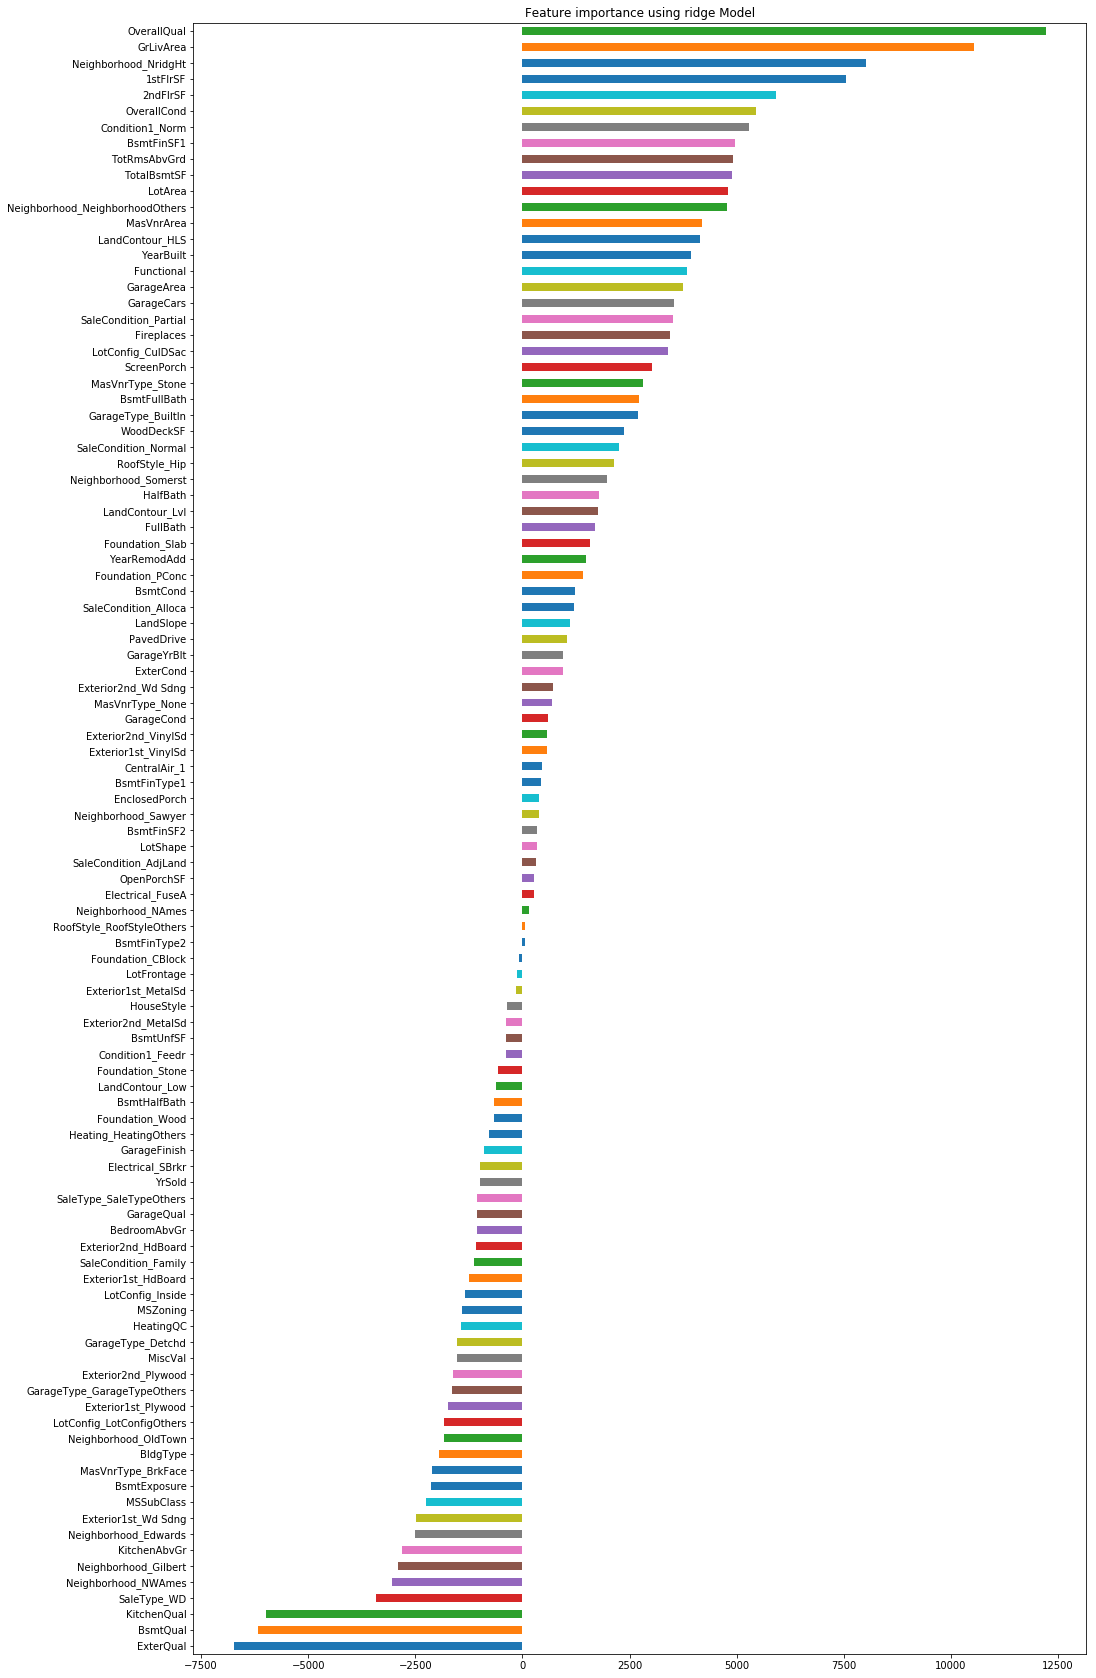

In [73]:
coef = pd.Series(ridge.coef_, index = X_train.columns)

print("ridge picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()

plt.figure(figsize=(16,30))
imp_coef.plot(kind = "barh")
plt.title("Feature importance using ridge Model")

## Lasso

In [74]:
lasso = Lasso()

# cross validation
model_cv3 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv3.fit(X_train, y_train) 

Fitting 5 folds for each of 31 candidates, totalling 155 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 155 out of 155 | elapsed:    8.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000, 2000, 3000, 4000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [75]:
cv_results = pd.DataFrame(model_cv3.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.079040,0.009962,0.001468,0.000404,0.0001,{'alpha': 0.0001},0.902971,0.884104,0.872747,0.876527,0.694877,0.846339,0.076352,29,0.895001,0.899051,0.898813,0.900406,0.929895,0.904633,0.012758
1,0.070200,0.001530,0.001183,0.000023,0.001,{'alpha': 0.001},0.902971,0.884104,0.872748,0.876527,0.694877,0.846339,0.076352,28,0.895001,0.899051,0.898813,0.900406,0.929895,0.904633,0.012758
2,0.071632,0.003024,0.001210,0.000081,0.01,{'alpha': 0.01},0.902971,0.884106,0.872754,0.876526,0.694880,0.846341,0.076351,27,0.895001,0.899051,0.898813,0.900406,0.929895,0.904633,0.012758
3,0.074911,0.003103,0.001198,0.000033,0.05,{'alpha': 0.05},0.902970,0.884115,0.872782,0.876523,0.694894,0.846350,0.076348,26,0.895001,0.899051,0.898813,0.900406,0.929895,0.904633,0.012758
4,0.075115,0.002052,0.001246,0.000118,0.1,{'alpha': 0.1},0.902970,0.884127,0.872816,0.876519,0.694912,0.846362,0.076344,25,0.895001,0.899051,0.898813,0.900406,0.929895,0.904633,0.012758


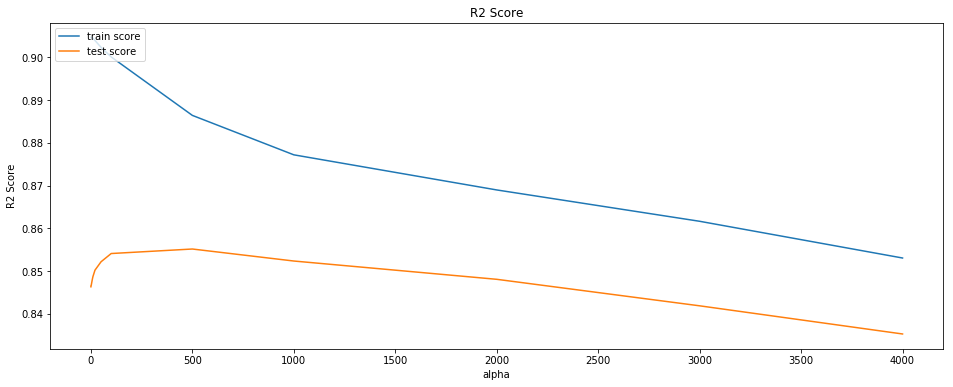

In [76]:
# plotting mean test and train scoes with alpha 
#cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,6))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')

plt.title("R2 Score")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [77]:
print(model_cv3.best_params_)

{'alpha': 500}


In [78]:
alpha = model_cv3.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

# predict prices of X_test
y_train_pred = lasso.predict(X_train)
r2 = sklearn.metrics.r2_score(y_train, y_train_pred)
print('Train R2 score',r2)

# predict prices of X_test
y_pred = lasso.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print('Test R2 score',r2)




Train R2 score 0.882959509531136
Test R2 score 0.8529477147279473


In [79]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")

list(zip(cols, model_parameters))

[('constant', 171691.366),
 ('MSSubClass', -3448.708),
 ('MSZoning', -1509.463),
 ('LotFrontage', -0.0),
 ('LotArea', 4774.533),
 ('LotShape', 0.0),
 ('LandSlope', 381.407),
 ('BldgType', -1348.577),
 ('HouseStyle', -0.0),
 ('OverallQual', 15014.526),
 ('OverallCond', 5268.272),
 ('YearBuilt', 6562.915),
 ('YearRemodAdd', 868.469),
 ('MasVnrArea', 2947.473),
 ('ExterQual', -7154.666),
 ('ExterCond', 602.955),
 ('BsmtQual', -6431.758),
 ('BsmtCond', 942.492),
 ('BsmtExposure', -1896.319),
 ('BsmtFinType1', 0.0),
 ('BsmtFinSF1', 4911.838),
 ('BsmtFinType2', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 3778.509),
 ('HeatingQC', -1614.522),
 ('1stFlrSF', 1755.969),
 ('2ndFlrSF', 0.0),
 ('GrLivArea', 23009.631),
 ('BsmtFullBath', 2775.949),
 ('BsmtHalfBath', -37.002),
 ('FullBath', 0.0),
 ('HalfBath', 96.774),
 ('BedroomAbvGr', -222.074),
 ('KitchenAbvGr', -1889.093),
 ('KitchenQual', -5761.982),
 ('TotRmsAbvGrd', 1467.702),
 ('Functional', 3640.501),
 ('Fireplaces', 2

In [80]:
coef = pd.Series(lasso.coef_, index = X_train.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 43 variables and eliminated the other 59 variables


In [81]:
imp_coef = coef.sort_values(ascending=False)
imp_coef

GrLivArea                          23009.631199
Neighborhood_NridgHt               17301.044755
OverallQual                        15014.526008
YearBuilt                           6562.915491
Condition1_Norm                     5811.560177
OverallCond                         5268.272143
Neighborhood_NeighborhoodOthers     5020.898728
BsmtFinSF1                          4911.837668
LotArea                             4774.533091
SaleCondition_Partial               3796.362412
TotalBsmtSF                         3778.508886
GarageCars                          3674.106695
Functional                          3640.501110
GarageArea                          3192.146198
MasVnrArea                          2947.473375
BsmtFullBath                        2775.948980
ScreenPorch                         2728.224613
Fireplaces                          2520.187609
WoodDeckSF                          1893.904532
1stFlrSF                            1755.968671
LotConfig_CulDSac                   1558

Text(0.5, 1.0, 'Feature importance using Lasso Model')

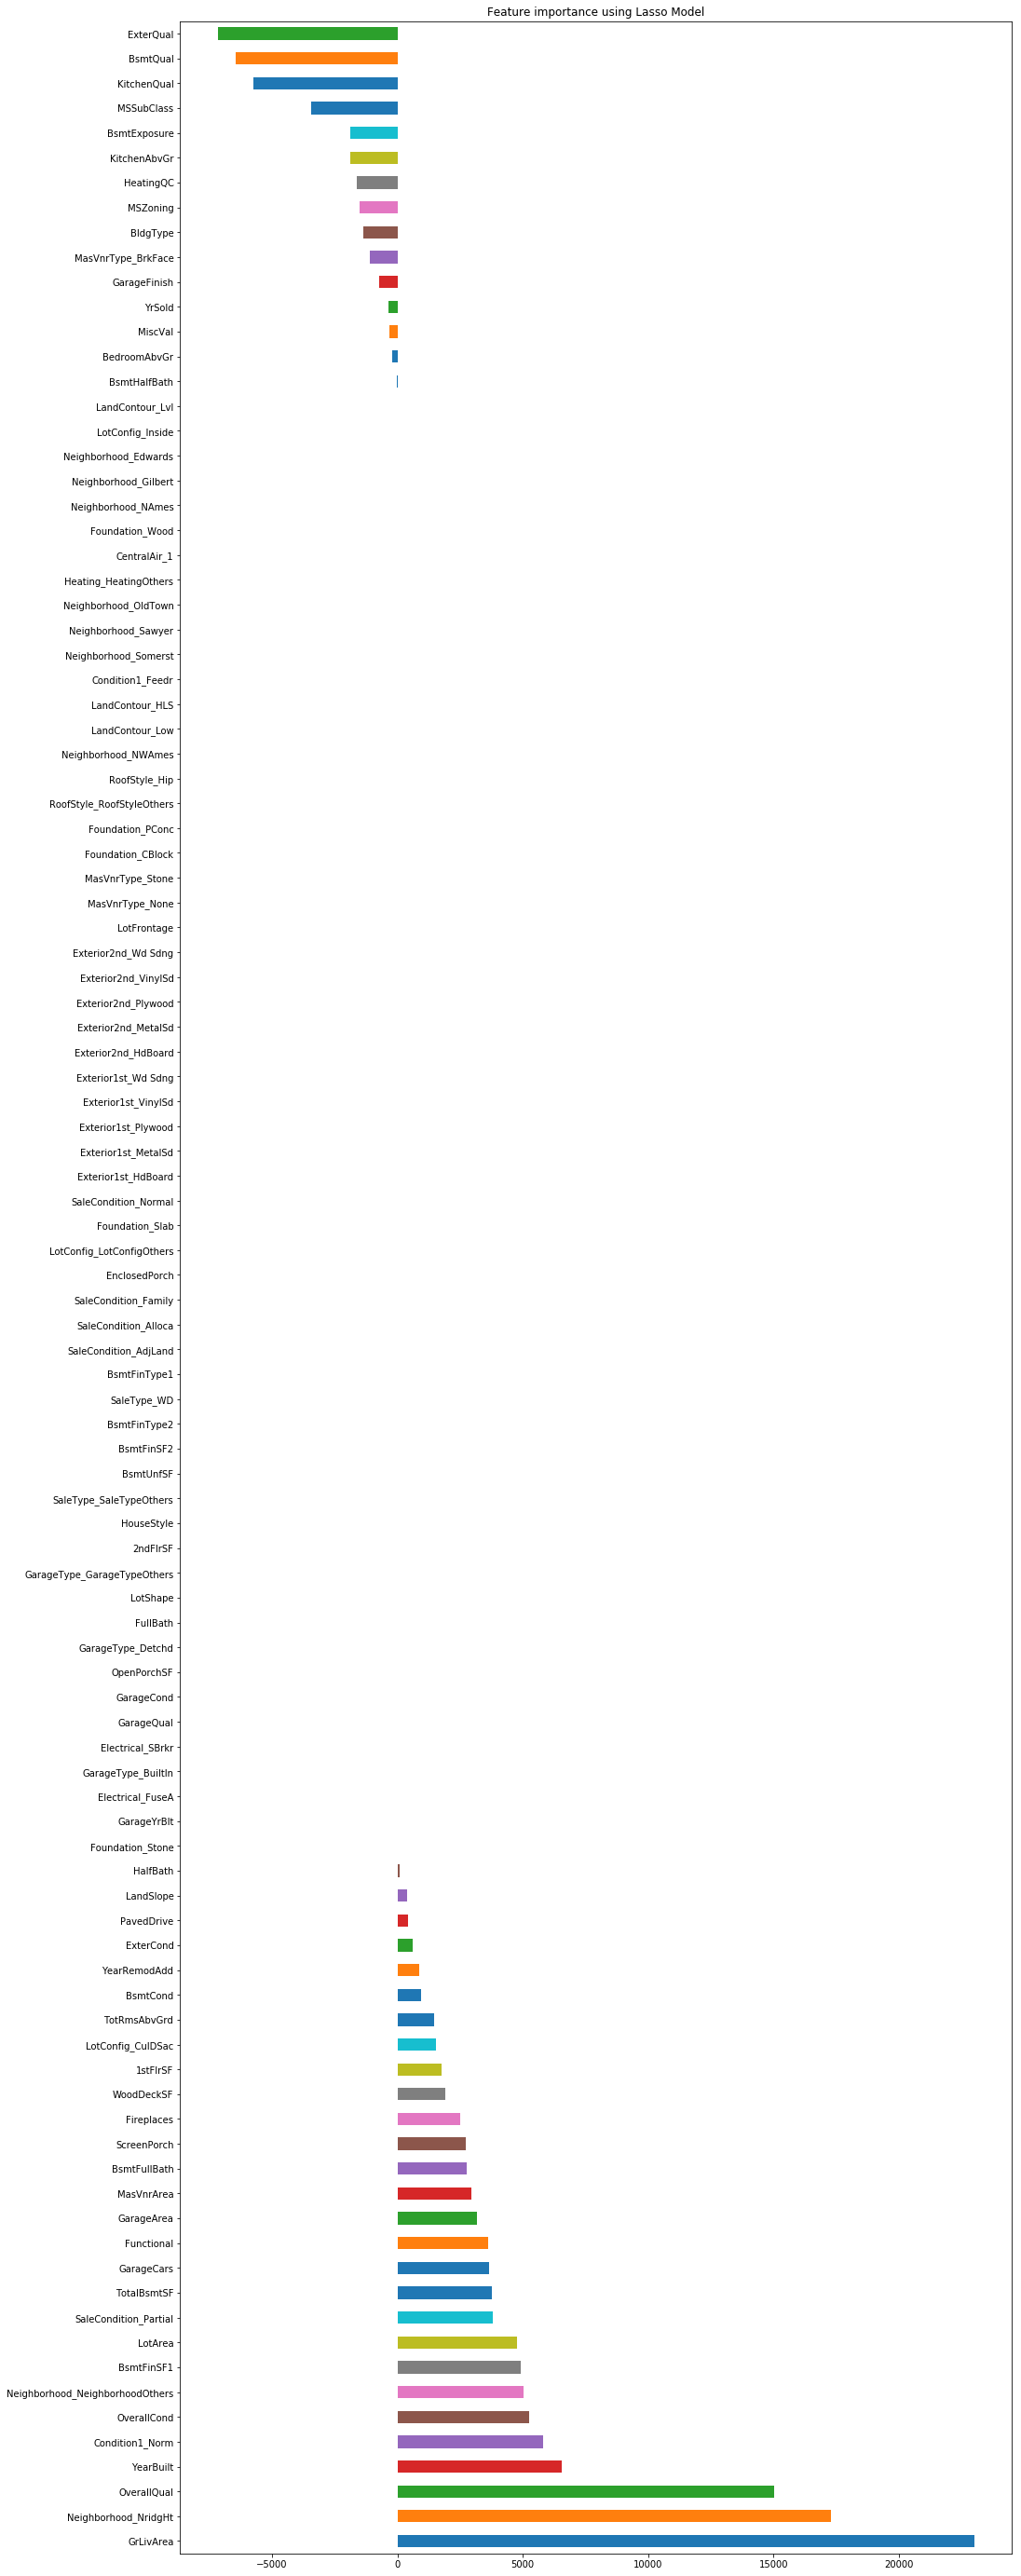

In [82]:
plt.figure(figsize=(16,50))
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

### Business Goal 

- You are required to model the price of houses with the available independent variables. 
-  This model will then be used by the management to understand how exactly the prices vary with the variables. 
- They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.
- Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

### Below are the observations derived from the above models 

- Linear regression Model
- train r2 score 0.8794053889075119
- test r2 score 0.8341207172108955
 -   No. of Feature in final Model 20 
 -   Disadvantage: we are peaking on the test data to tune our hyperparameter(no. of features)

    
- Linear regression Model with K fold Cross Validation 
- train r2 score 0.900084736511957
- test r2 score 0.8438978339212659
  -   No. of Feature in final Model 94
      

- Ridge Regression
- Train r2 score 0.8864029286596737
- Test R2 score 0.8506945010633415
 -   No. of Feature in final Model 126
 -   Lambda = 100


- Lasso Regression
- Train R2 score 0.882959509531136
- Test R2 score 0.8529477147279473
  -   No. of Feature in final Model 38  
  -   Lambda = 500 
  -   Advantage:  Featrues reduced drastically from 126 to 43 by making coefficient 0. where as r2 score for both ridge and lasso is same. 
     Hence lasso is a better model

Features impacting sale price and their coefficient

GrLivArea                          23009.631199

Neighborhood_NridgHt               17301.044755

OverallQual                        15014.526008

YearBuilt                           6562.915491

Condition1_Norm                     5811.560177

OverallCond                         5268.272143

Neighborhood_NeighborhoodOthers     5020.898728

BsmtFinSF1                          4911.837668

LotArea                             4774.533091

SaleCondition_Partial               3796.362412

TotalBsmtSF                         3778.508886

GarageCars                          3674.106695

Functional                          3640.501110

GarageArea                          3192.146198

MasVnrArea                          2947.473375

BsmtFullBath                        2775.948980

ScreenPorch                         2728.224613

Fireplaces                          2520.187609

WoodDeckSF                          1893.904532

1stFlrSF                            1755.968671

LotConfig_CulDSac                   1558.475953

TotRmsAbvGrd                        1467.701977

BsmtCond                             942.491509


YearRemodAdd                         868.469403

ExterCond                            602.954851

PavedDrive                           438.484328

LandSlope                            381.407062

HalfBath                              96.773961

BsmtHalfBath                         -37.001689

BedroomAbvGr                        -222.073908


MiscVal                             -333.865574

YrSold                              -345.782252

GarageFinish                        -741.094731

MasVnrType_BrkFace                 -1083.571742

BldgType                           -1348.577009

MSZoning                           -1509.463456

HeatingQC                          -1614.521862

KitchenAbvGr                       -1889.093122

BsmtExposure                       -1896.318762

MSSubClass                         -3448.708023

KitchenQual                        -5761.982452

BsmtQual                           -6431.757747

ExterQual                          -7154.666345

Below are the main features highly impacting the samle price
- GrLivArea                        
- Neighborhood_NridgHt             
- OverallQual                      
- YearBuilt                       
- Condition1_Norm                    
- OverallCond                       
- Neighborhood_NeighborhoodOthers     
- BsmtFinSF1                        
- LotArea                            
- GarageFinish                    
- MasVnrType_BrkFace              
- BldgType                         
- MSZoning                         
- HeatingQC                     
- KitchenAbvGr                     
- BsmtExposure                   
- MSSubClass                    
- KitchenQual                       
- BsmtQual                          
- ExterQual                         